# Library Imports

In [28]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sborn
import warnings

from math import sqrt
from datetime import datetime

%matplotlib inline

# Loading the Data

In [29]:
# states to analyze
state_data_list = ["Andhra Pradesh","MP","Rajasthan1","Tamil Nadu"]
data = {}
for state in state_data_list:
    data[state] = []

In [30]:
# for each state
for state in state_data_list:
    statedir="/content/drive/MyDrive/RenewableEnergyData"+'/'+state;
    # Read from *2000.csv to *2014.csv in order for the state
    for file in sorted(os.listdir(statedir), key=lambda file_name: file_name[-8:]): 
        data_tmp = pd.read_csv(statedir+'/'+file, skiprows=2, 
                               parse_dates={'Date_Time': ['Year','Month','Day','Hour']},
                               date_parser=lambda x: datetime.strptime(x, '%Y %m %d %H'))
        data[state].extend(data_tmp.values)

In [31]:
# data frame for Madhya Pradesh
column_names = ['Date_Time','Minute','DHI','DNI','GHI','Clearsky DHI',
                'Clearsky DNI','Clearsky GHI','Dew Point','Temperature','Pressure',
                'Relative Humidity','Solar Zenith Angle','Snow depth','Wind Speed','NAN']
MP_data = pd.DataFrame(data['MP'],
                       columns=column_names)[pd.DataFrame(data['MP'],columns=
                                                          column_names)['Wind Speed'].notna()]
MP_data.name = 'Madhya Pradesh'
print(MP_data.shape)
MP_data.head()

(131400, 16)


,Date_Time,Minute,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Snow depth,Wind Speed,NAN
0,2000-01-01 00:00:00,0,0,0,0,0,0,0,3,13.986429,964.509827,48.661484,175.597127,0,2.733917,NaN
1,2000-01-01 01:00:00,0,0,0,0,0,0,0,3,13.684157,964.110107,50.296294,162.005468,0,2.660168,NaN
2,2000-01-01 02:00:00,0,0,0,0,0,0,0,3,13.329301,963.844177,51.627187,148.352035,0,2.655523,NaN
3,2000-01-01 03:00:00,0,0,0,0,0,0,0,3,13.000682,963.355286,52.655196,134.784919,0,2.693983,NaN
4,2000-01-01 04:00:00,0,0,0,0,0,0,0,3,12.782371,963.358093,54.141549,121.369895,0,2.719821,NaN


In [32]:
# dataframe for Rajasthan
RJ_data = pd.DataFrame(data['Rajasthan1'],
                       columns=column_names)[pd.DataFrame(data['Rajasthan1'],
                                                          columns=column_names)['Wind Speed'].notna()]
RJ_data.name = 'Rajasthan'
print(RJ_data.shape)
RJ_data.head()

(131400, 16)


,Date_Time,Minute,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Snow depth,Wind Speed,NAN
0,2000-01-01 00:00:00,0,0,0,0,0,0,0,-4,13.811437,982.749817,27.447862,174.755997,0,3.976945,NaN
1,2000-01-01 01:00:00,0,0,0,0,0,0,0,-4,13.117300,982.670105,29.048857,169.544205,0,4.017371,NaN
2,2000-01-01 02:00:00,0,0,0,0,0,0,0,-4,12.433960,982.404175,31.216659,156.340938,0,3.992325,NaN
3,2000-01-01 03:00:00,0,0,0,0,0,0,0,-3,11.797632,982.555298,34.956075,142.945864,0,3.981812,NaN
4,2000-01-01 04:00:00,0,0,0,0,0,0,0,-1,11.195487,982.558105,41.177540,129.625767,0,3.985008,NaN


In [33]:
# dataframe for Tamil Nadu
TN_data = pd.DataFrame(data['Tamil Nadu'],
                       columns=column_names)[pd.DataFrame(data['Tamil Nadu'],
                                                          columns=column_names)['Wind Speed'].notna()]
TN_data.name = 'Tamil Nadu'
print(TN_data.shape)
TN_data.head()

(131400, 16)


,Date_Time,Minute,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Snow depth,Wind Speed,NAN
0,2000-01-01 00:00:00,0,0,0,0,0,0,0,21,22.361598,951.069824,94.747772,166.221817,0,0.443917,NaN
1,2000-01-01 01:00:00,0,0,0,0,0,0,0,21,22.113735,950.670105,94.587796,158.952849,0,0.437194,NaN
2,2000-01-01 02:00:00,0,0,0,0,0,0,0,21,21.932924,950.084167,94.527398,146.731555,0,0.415404,NaN
3,2000-01-01 03:00:00,0,0,0,0,0,0,0,20,21.802145,949.915283,94.564467,133.338946,0,0.379369,NaN
4,2000-01-01 04:00:00,0,0,0,0,0,0,0,20,21.677566,950.238098,94.428675,119.610011,0,0.340168,NaN


In [34]:
# columns for Andhra Pradesh
column_names_AP=column_names[0:13] # No Snow Depth in the Andhra Pradesh data
column_names_AP.extend(column_names[14:])
column_names_AP

['Date_Time',
 'Minute',
 'DHI',
 'DNI',
 'GHI',
 'Clearsky DHI',
 'Clearsky DNI',
 'Clearsky GHI',
 'Dew Point',
 'Temperature',
 'Pressure',
 'Relative Humidity',
 'Solar Zenith Angle',
 'Wind Speed',
 'NAN']

In [35]:
AP_data = pd.DataFrame(data['Andhra Pradesh'],
                       columns=column_names_AP)[pd.DataFrame(data['Andhra Pradesh'],
                                                             columns=column_names_AP)['Wind Speed'].notna()]
AP_data.name = 'Andhra Pradesh'
print(AP_data.shape)
AP_data.head()

(131400, 15)


,Date_Time,Minute,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Wind Speed,NAN
0,2000-01-01 00:00:00,0,0,0,0,0,0,0,20,20.736232,937.309814,97.636380,171.103614,1.820233,NaN
1,2000-01-01 01:00:00,0,0,0,0,0,0,0,20,20.547621,936.590149,97.764840,162.082357,1.616232,NaN
2,2000-01-01 02:00:00,0,0,0,0,0,0,0,20,20.405927,936.324219,98.032320,148.957279,1.382257,NaN
3,2000-01-01 03:00:00,0,0,0,0,0,0,0,20,20.305098,936.155273,98.152521,135.256602,1.173256,NaN
4,2000-01-01 04:00:00,0,0,0,0,0,0,0,19,20.266761,936.478088,98.132011,121.461475,0.998815,NaN


# Tests for Normality

In [36]:
# setting the significance of normality tests
alpha = 0.05

In [37]:
# hypothesis testing
# H0: The Distribution is Normal
# Ha: The Distribution is Not Normal
def hypothesisTesting(pVal, alphaVal):
  if (pVal > alphaVal):
    print("The Distribution is Normal. Failed to reject H0.")
  else:
    print("The Distribution is Not Normal. H0 rejected.")
  print("\n")

In [38]:
# Shapiro-Wilk test
def shapiroWilkTest(dat):
  swStat, pvalue = st.shapiro(dat)
  print('\nShapiro-Wilk Statistic = %.3f; p = %.3f' % (swStat, pvalue))
  hypothesisTesting(pvalue, alpha)

In [39]:
# D'Agnostino's K^2 test
def dagnostino(dat):
  daStat, pvalue = st.normaltest(dat)
  print('\nD\'Agnostino\'s K^2 Statistic = %.3f, p = %.3f' % (daStat, pvalue))
  hypothesisTesting(pvalue, alpha)

In [40]:
# making a list of dataframes
dataframes = [AP_data , MP_data, RJ_data , TN_data]



Andhra Pradesh


Shapiro-Wilk Statistic = 0.968; p = 0.000
The Distribution is Not Normal. H0 rejected.



D'Agnostino's K^2 Statistic = 7710.597, p = 0.000
The Distribution is Not Normal. H0 rejected.




Madhya Pradesh


Shapiro-Wilk Statistic = 0.978; p = 0.000
The Distribution is Not Normal. H0 rejected.



D'Agnostino's K^2 Statistic = 6340.722, p = 0.000
The Distribution is Not Normal. H0 rejected.




Rajasthan


Shapiro-Wilk Statistic = 0.983; p = 0.000
The Distribution is Not Normal. H0 rejected.



D'Agnostino's K^2 Statistic = 4618.005, p = 0.000
The Distribution is Not Normal. H0 rejected.




Tamil Nadu


Shapiro-Wilk Statistic = 0.962; p = 0.000
The Distribution is Not Normal. H0 rejected.



D'Agnostino's K^2 Statistic = 9026.001, p = 0.000
The Distribution is Not Normal. H0 rejected.




/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


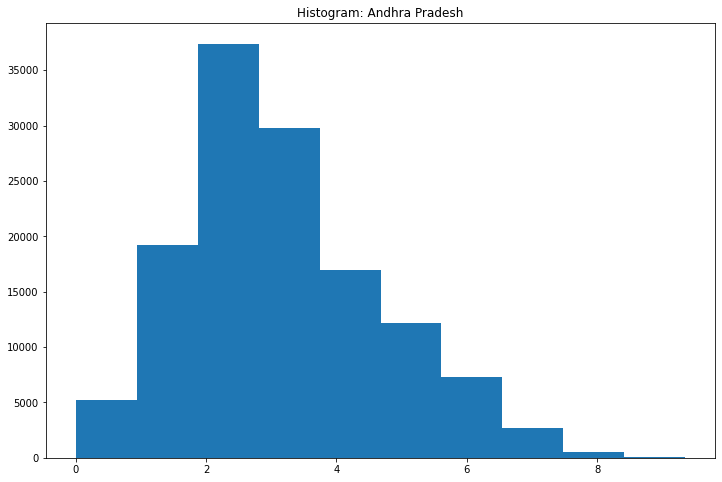

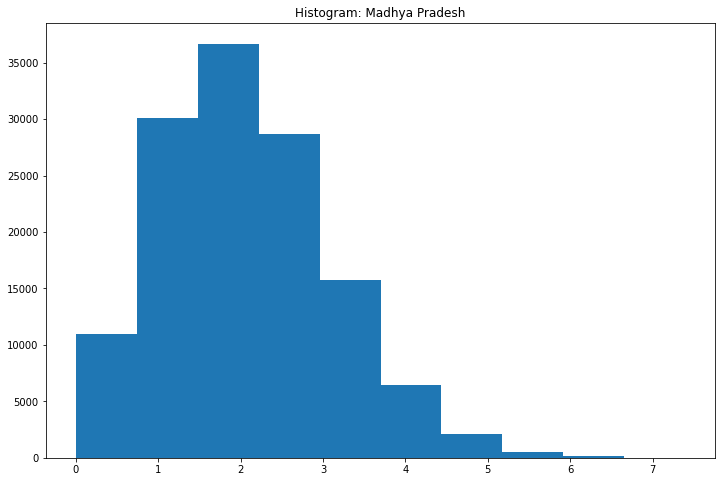

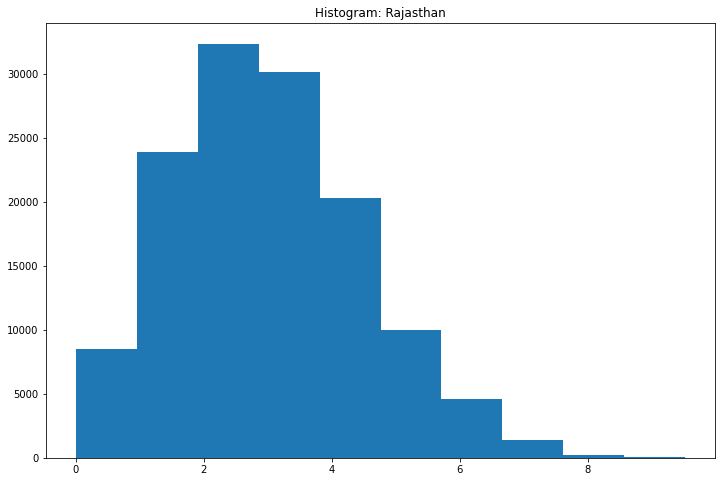

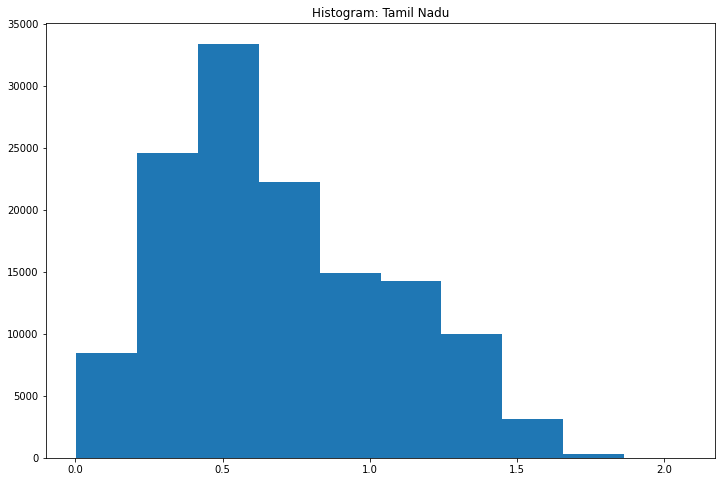

In [41]:
# plotting the wind distributions
# and checking for normality
for dataframex in dataframes:
    # plot wind speeds
    plt.figure(figsize=(12, 8))
    axes = plt.axes()
    axes.set_title('Histogram: '+str(dataframex.name))
    windDat = dataframex["Wind Speed"]
    plt.hist(windDat)

    print("\n\n{}\n".format(dataframex.name))
    shapiroWilkTest(windDat)
    dagnostino(windDat)

# Finding the Best Fit Distribution

In [42]:
# wind speeds for none of the states fit normal distribution
# searching among other common distribution candidates to fit the data

In [43]:
warnings.filterwarnings('default')
warnings.simplefilter('default')

In [44]:
# the candidate distributions to try
candidateList = [  
        st.beta, st.gamma, st.rayleigh, 
        st.norm, st.logistic, st.weibull_min,
        st.weibull_max,st.lognorm,st.chi,
        st.expon,st.invgamma, st.loggamma,
         st.loglaplace,st.chi2,st.cosine
    ]

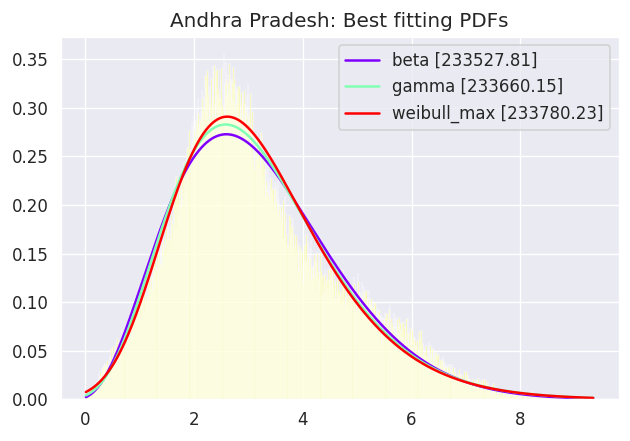

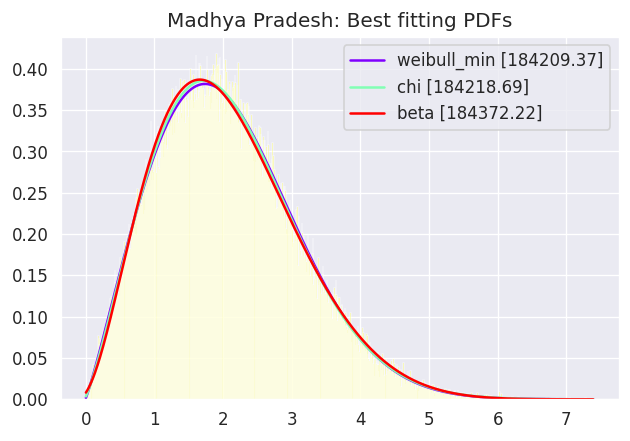

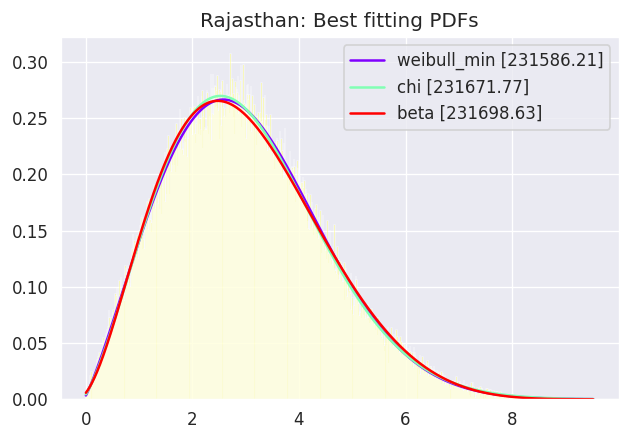

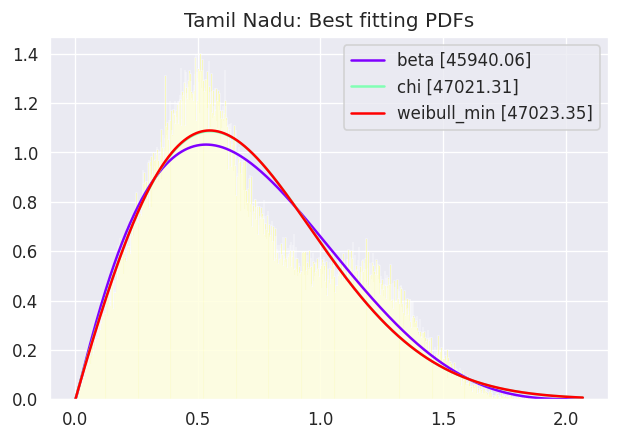

In [51]:
# run the test for each state
for dataframex in dataframes:
    windDat = dataframex['Wind Speed']
    xToPlot = np.linspace(windDat.min(), windDat.max(), 1000)
    
    sborn.set_style("darkgrid")

    # to store fit information of the candidate distributions
    # to the wind speed data
    fitData = []

    with warnings.catch_warnings():
        warnings.simplefilter("ignore")

        for candidate in candidateList:
          # extract the name of the distribution
          # from the library name
          distrName = str(type(candidate)).split(".")[-1][:-6]

          # fit it to the wind speed data
          params = candidate.fit(windDat)
          
          # arguments
          arg = params[:-2]

          # location
          loc = params[-2]

          # scale of distribution
          scale = params[-1]

          # probability density values at
          # each x value to plot
          pdfFit = candidate.pdf(xToPlot, loc = loc, scale = scale, *arg)

          # evaluation metrics
          # (1) negative log likelihood
          mle = candidate.nnlf(params, windDat)

          # (2) sum of squared errors
          sse = np.sum(np.power((xToPlot - pdfFit), 2.0))

          # adding the fit information for the candidate
          fitData.append({
              "name": distrName, "mle": mle,
              "sse":sse,"pdf": pdfFit, 
              "params": params })

    # plot data on histogram
    fig, ax = plt.subplots(1, 1, dpi = 120)
    ax.hist(windDat, xToPlot, density = True, 
                color = "yellow", alpha = 0.4)  

    top = 3
    ax.set_prop_cycle('color', plt.cm.rainbow(np.linspace(0, 1, top)))
    ax.set_title(dataframex.name + ": Best fitting PDFs")

    sort_by = "mle" # can switch to sse
    for d in sorted(fitData, 
                    key= lambda k: k[sort_by])[:top]:
        distrName = d['name']
        mle = d['mle']
        pdfFit = d['pdf']
        params = d['params']

        label = "{} [{:.2f}]".format(distrName, mle)
        ax.plot(xToPlot, pdfFit, label = label)

    ax.legend()